# 数据统计

## 预设

### 导入库

In [53]:
import sys
sys.path.append("..")
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from utils import *

### 全局参数

In [54]:
DictionaryFilePath = 'data/西安城市形象编码词表.pkl'
DataFilePath = 'data/西安城市形象数据_关键词_议题分类.pkl'

### 全局设置

## 函数工具

In [55]:
# pandas 获取总数
def get_class_sum(class_list, target_df, data, field = None, filter_content = ''):
    # 保存列名
    target_column = filter_content + '总数'
    
    if field and filter_content:
        for column in class_list:
            target_df.loc[column, target_column] = data[data[field]==filter_content][column].sum()
    elif not field or not filter_content:
        for column in class_list:
            target_df.loc[column, target_column] = data[column].sum()
    else:
        logger.error(f'没有指定过滤列名称,field:{field},filter_content:{filter_content}')

    target_df[target_column] = target_df[target_column].astype('Int64')
    return target_df

In [56]:
# pandas 时间切分
def time_cut(df, time_column_name, freq_count = 1, freq_tag = 'M'):
    if freq_count:
        if freq_count == 1:
            freq_str = freq_tag
        else:
            freq_str = str(freq_count)+freq_tag
    if freq_tag == 'D':
        bins = pd.date_range(start=pd.datetime.date(df['发布时间'].iloc[0]), end=pd.datetime.date(df['发布时间'].iloc[-1]+pd.DateOffset(days=freq_count)), freq = freq_str)
    elif freq_tag == 'M' or freq_tag == 'MS':
        bins = pd.date_range(start=pd.datetime.strftime(df['发布时间'].iloc[0], '%Y-%m'), end=pd.datetime.strftime(df['发布时间'].iloc[-1]+pd.DateOffset(months=freq_count), '%Y-%m'), freq = freq_str)
        logger.debug(freq_str)
        logger.debug(bins)
    else:
        logger.error(f'切分单位错位：{freq_tag}')
        return
    df.loc[:,f'{time_column_name}_group']=pd.cut(df[time_column_name],bins,right=False)
    return df

## 数据读取

In [57]:
dictionary_comparison_table = pd.read_pickle(DictionaryFilePath)
data = pd.read_pickle(DataFilePath)

## 数据处理

### 时间段统计

### 预处理

In [58]:
data['发布时间'] = pd.to_datetime(data['发布时间'])
data = data[data['发布时间'].notna()].sort_values(by='发布时间').reset_index(drop=True)

In [59]:
# data = data[data['发布时间'] > '2017-08-01']

In [60]:
data['发布时间'].iloc[0]

Timestamp('2009-04-23 19:07:34')

### 划分的两种方式

In [61]:
# 按时间段划分
data = time_cut(data, '发布时间', 1, 'D')

/var/folders/pd/tl2_nnd51j11dlh8x31_rxqh0000gn/T/ipykernel_93579/1477019537.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  bins = pd.date_range(start=pd.datetime.date(df['发布时间'].iloc[0]), end=pd.datetime.date(df['发布时间'].iloc[-1]+pd.DateOffset(days=freq_count)), freq = freq_str)


In [62]:
# 按字符串方法划分（只能按月划分）
data['发布时间'] = data['发布时间'].dt.strftime('%Y-%m-%d')

In [63]:
data = data[data['平台']=='微博']

In [64]:
data_count = data.groupby('发布时间').agg('count')

## 数据展示

In [79]:
data_to_show = data_count['2021-08-01':'2022-01-05']
data_to_show

,内容,点赞数,收藏数,转发数,user_tag,平台,评论数,关键词,政治环境,政治环境选中词,...,市民样貌选中词,积极判断框架,积极判断框架选中词,消极判断框架,消极判断框架选中词,事件框架,事件框架选中词,细节框架,细节框架选中词,发布时间_group
发布时间,,,,,,,,,,,,,,,,,,,,,
2021-08-01,121,121,121,121,121,121,121,121,121,121,...,121,121,121,121,121,121,121,121,121,121
2021-08-02,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
2021-08-03,91,91,91,91,91,91,91,91,91,91,...,91,91,91,91,91,91,91,91,91,91
2021-08-04,150,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,150
2021-08-05,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
2021-08-06,116,116,116,116,116,116,116,116,116,116,...,116,116,116,116,116,116,116,116,116,116
2021-08-07,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
2021-08-08,71,71,71,71,71,71,71,71,71,71,...,71,71,71,71,71,71,71,71,71,71
2021-08-09,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92


## 可视化

/Users/zack/.pyenv/versions/3.11.0/envs/NLP_Basic/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21457 (\N{CJK UNIFIED IDEOGRAPH-53D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zack/.pyenv/versions/3.11.0/envs/NLP_Basic/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zack/.pyenv/versions/3.11.0/envs/NLP_Basic/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zack/.pyenv/versions/3.11.0/envs/NLP_Basic/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zack/.pyenv/versions/3.11.0/envs/NLP_Basi

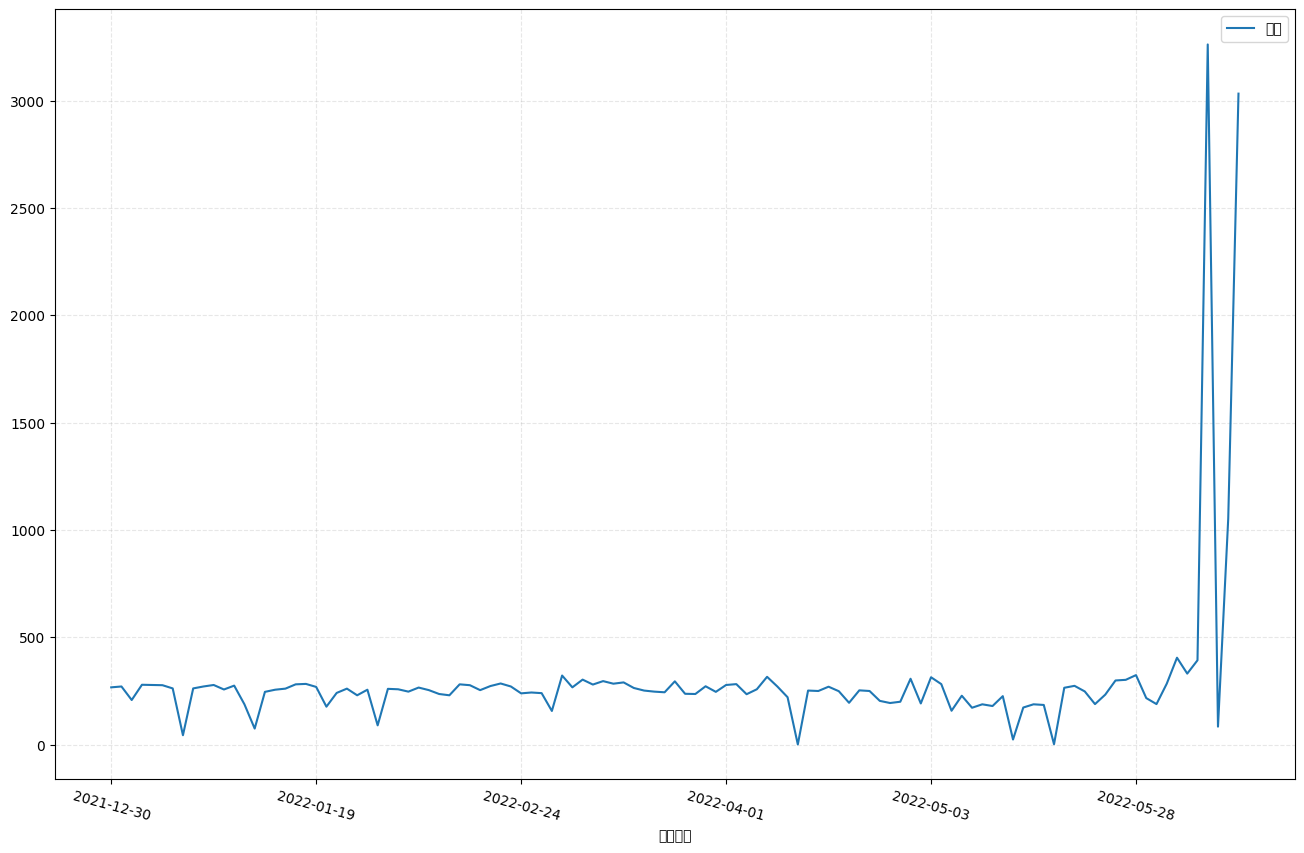

In [73]:
ax = data_to_show.loc[:, ['内容']].plot(
    figsize=(16, 10),
    secondary_y=['gmv'],
    x_compat=True,
    grid=True)
ax.grid(visible=True, linestyle="--", alpha=0.3)
# plt.xlim((pd.Timestamp('2021-11'), pd.Timestamp('2022-9')))
# plt.xticks(pd.date_range(start ='2021-11', end = '2022-9', freq='M'))
plt.xticks(rotation=-15) 
plt.show()

## 数据保存

### 数量统计

In [67]:
data_to_save = dictionary_statistics_df
OutFilePath = get_new_path(DictionaryFilePath, '统计_数量分布')
data_to_save.to_pickle(OutFilePath)

NameError: name 'dictionary_statistics_df' is not defined

### 时间段分割

In [ ]:
data_to_save = data
OutFilePath = get_new_path(DataFilePath, '时间分割')
data_to_save.to_pickle(OutFilePath)

## 测试&playground